# Operaciones con series y Dataframes   

In [2]:
#librerias

import numpy as np
import pandas as pd

In [4]:
datos_1=np.array([[1000,3000],[5000,1000],[4200,6000],[5000,5500]])
t1=pd.DataFrame(datos_1,columns=('Gastos','Ingresos'),index=[2006,2002,2005,2007])
print(t1)
datos_2=np.array([[1000,5000],[5000,5000],[2500,3000],[2500,1500]])
t2=pd.DataFrame(datos_2,columns=('Gastos','Ingresos'),index=[2002,2006,2007,2008])
print(t2)


      Gastos  Ingresos
2006    1000      3000
2002    5000      1000
2005    4200      6000
2007    5000      5500
      Gastos  Ingresos
2002    1000      5000
2006    5000      5000
2007    2500      3000
2008    2500      1500


In [5]:
# Utilización de los métodos add, sub, div y mul
# fill_value permite indicar el valor por defecto para aquellas etiquetas que no aparecen en él indice
t1.add(t2, fill_value= 0)

,Gastos,Ingresos
2002,6000.0,6000.0
2005,4200.0,6000.0
2006,6000.0,8000.0
2007,7500.0,8500.0
2008,2500.0,1500.0


In [12]:
#ordenar el indice lexicográficamente

print(t1.sort_index(ascending= False))

print(t1.sort_values(by = ['Gastos','Ingresos'], ascending=[True,False]))

      Gastos  Ingresos
2007    5000      5500
2006    1000      3000
2005    4200      6000
2002    5000      1000
      Gastos  Ingresos
2006    1000      3000
2005    4200      6000
2007    5000      5500
2002    5000      1000


In [18]:
# Tratamiento de los valores NaN (Not a Number)

s1 = pd.Series([1,np.nan,2], index=['A','B','C'])
print(s1)

s1.dropna()




A    1.0
B    NaN
C    2.0
dtype: float64


A    1.0
C    2.0
dtype: float64

In [22]:
t3=pd.DataFrame(
    data=[(np.nan,'ES',46449,np.nan),
          (np.nan,np.nan,np.nan,np.nan),
          ('Japón','JP',np.nan,'2005')],
    columns=['País','Código','Pob.','Año'])
print(t3)

print(t3.dropna(how = 'all', axis = 0))

    País Código     Pob.   Año
0    NaN     ES  46449.0   NaN
1    NaN    NaN      NaN   NaN
2  Japón     JP      NaN  2005
    País Código     Pob.   Año
0    NaN     ES  46449.0   NaN
2  Japón     JP      NaN  2005


In [24]:
#eliminar aquellas filas que no tienen al menos 3 valores distintos de NaN
t3.dropna(axis = 0, thresh=2)

,País,Código,Pob.,Año
0,NaN,ES,46449.0,NaN
2,Japón,JP,NaN,2005


In [26]:
# en el caso que no queramos eliminar los valores NaN

#fillna sustitute todos los valores NaN por un valore concretos
t3.fillna(0)

#Ojo para funciones estadisticas pandas no tiene en cuenta los valores NaN

,País,Código,Pob.,Año
0,0,ES,46449.0,0
1,0,0,0.0,0
2,Japón,JP,0.0,2005


In [29]:
#Tener en cuenta los valores nulos
print(t3)
t3.mean(skipna=False)

    País Código     Pob.   Año
0    NaN     ES  46449.0   NaN
1    NaN    NaN      NaN   NaN
2  Japón     JP      NaN  2005


/tmp/ipykernel_200267/3392342986.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  t3.mean(skipna=False)


Pob.   NaN
dtype: float64

In [32]:
#Relación entre variables : correlación y varianza

datos=[[40,58,115],[43,59,117],[41,60,120],[38,61,120],[36,62,126],[40,63,122]]
t5=pd.DataFrame(datos,columns=['Edad','Peso','Altura'])
print(t5)

correlacion = t5.corr()
print(correlacion)

   Edad  Peso  Altura
0    40    58     115
1    43    59     117
2    41    60     120
3    38    61     120
4    36    62     126
5    40    63     122
            Edad      Peso    Altura
Edad    1.000000 -0.529641 -0.708300
Peso   -0.529641  1.000000  0.861444
Altura -0.708300  0.861444  1.000000


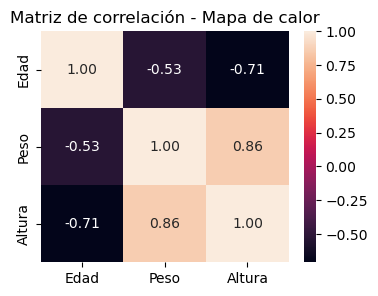

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
f,ax=plt.subplots(1,figsize=(4,3))
sns.heatmap(correlacion,vmax=1,square=False,annot=True,fmt='.2f')
ax.set_title('Matriz de correlación ‑ Mapa de calor');

            Edad  Peso  Altura
Edad    5.866667  -2.4    -6.6
Peso   -2.400000   3.5     6.2
Altura -6.600000   6.2    14.8
   Edad  Peso  Altura
0    40    58     115
1    43    59     117
2    41    60     120
3    38    61     120
4    36    62     126
5    40    63     122


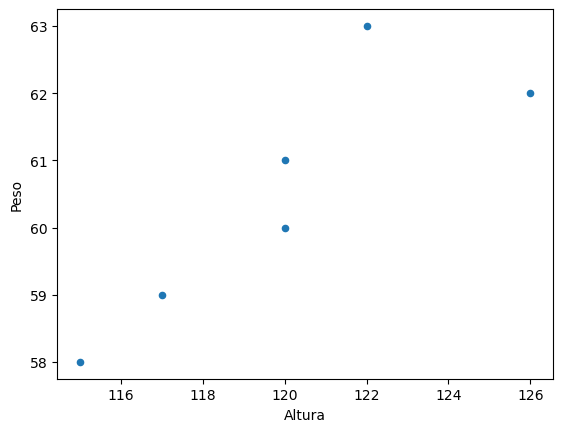

In [45]:
print(t5.cov())
print(t5)
t5.plot(kind='scatter',x='Altura',y='Peso');
plt.xlabel('Altura')
plt.ylabel('Peso');